In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive/Projects/Plant-Leaf-Disease-Prediction".
!ls "/content/drive/My Drive/Plant-Leaf-Disease-Prediction"

Dataset  Plant_disease_prediction_using_CNN


In [ ]:
!ls "/content/drive/My Drive/Plant-Leaf-Disease-Prediction/Dataset"

'Corn_(maize)_Common_rust'   Potato_Early_blight   Tomato_Bacterial_spot


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

In [ ]:
print(tf. __version__)

2.15.0


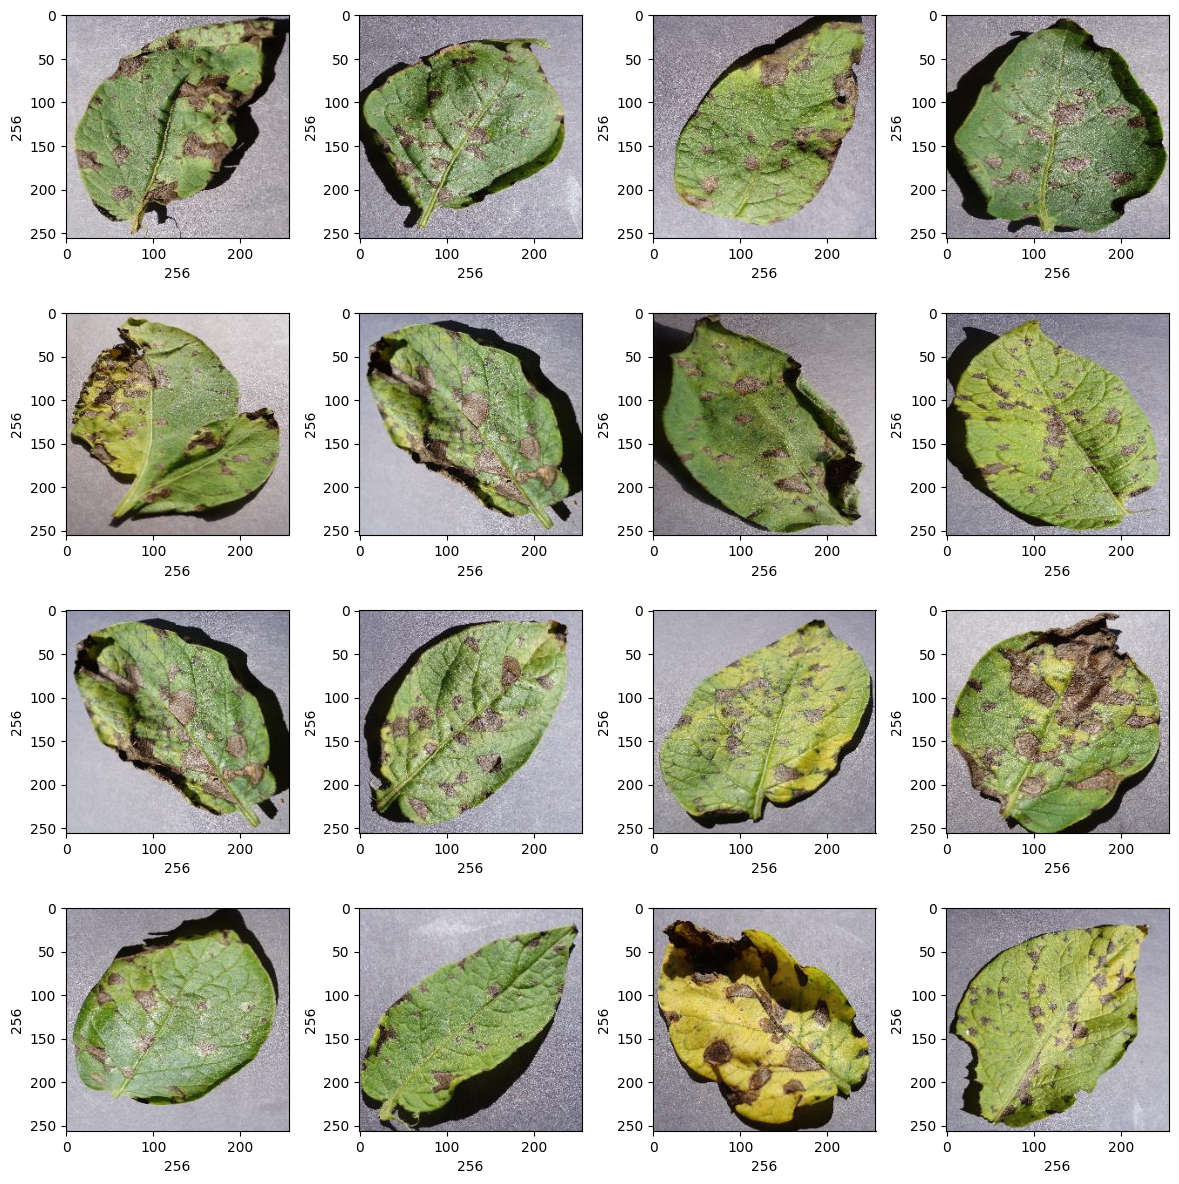

In [ ]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "/content/drive/My Drive/Plant-Leaf-Disease-Prediction/Dataset/Potato_Early_blight"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [ ]:
#Converting Images to array
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [ ]:
dir = "/content/drive/My Drive/Plant-Leaf-Disease-Prediction/Dataset"
image_list, label_list = [], []
all_labels = ['Tomato-Bacterial_spot', 'Potato-Early_blight', 'Corn-Common_rust']
binary_labels = [0,1,2]
temp = -1

# Reading and converting image to numpy array
for directory in ['Tomato_Bacterial_spot', 'Potato_Early_blight', 'Corn_(maize)_Common_rust']:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

In [ ]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0    300
1    300
2    300
dtype: int64

In [ ]:
image_list[0].shape

(256, 256, 3)

In [ ]:
label_list = np.array(label_list)
label_list.shape

(900,)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)

In [ ]:
x_train = np.array(x_train, dtype=np.float16) / 255.0
x_test = np.array(x_test, dtype=np.float16) / 255.0
x_train = x_train.reshape( -1, 256,256,3)
x_test = x_test.reshape( -1, 256,256,3)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 85, 85, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 42, 42, 16)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dense (Dense)               (None, 8)                 2

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

In [ ]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 10)

In [ ]:
# Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/50
5/5 [==============================] - 46s 8s/step - loss: 1.0454 - accuracy: 0.3524 - val_loss: 0.9517 - val_accuracy: 0.4236
Epoch 2/50
5/5 [==============================] - 37s 8s/step - loss: 0.9166 - accuracy: 0.6181 - val_loss: 0.8143 - val_accuracy: 0.8056
Epoch 3/50
5/5 [==============================] - 39s 8s/step - loss: 0.7628 - accuracy: 0.8299 - val_loss: 0.6672 - val_accuracy: 0.8333
Epoch 4/50
5/5 [==============================] - 39s 8s/step - loss: 0.6237 - accuracy: 0.8646 - val_loss: 0.5445 - val_accuracy: 0.9306
Epoch 5/50
5/5 [==============================] - 37s 8s/step - loss: 0.5023 - accuracy: 0.9236 - val_loss: 0.4437 - val_accuracy: 0.9306
Epoch 6/50
5/5 [==============================] - 38s 8s/step - loss: 0.4035 - accuracy: 0.9462 - val_loss: 0.3710 - val_accuracy: 0.9375
Epoch 7/50
5/5 [==============================] - 51s 10s/step - loss: 0.3290 - accuracy: 0.9566 - val_loss: 0.3155 - val_accuracy: 0.9236
Epoch 8/50
5/5 [=================

In [ ]:
model.save("/content/drive/My Drive/Plant-Leaf-Disease-Prediction/Model/plant_disease_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


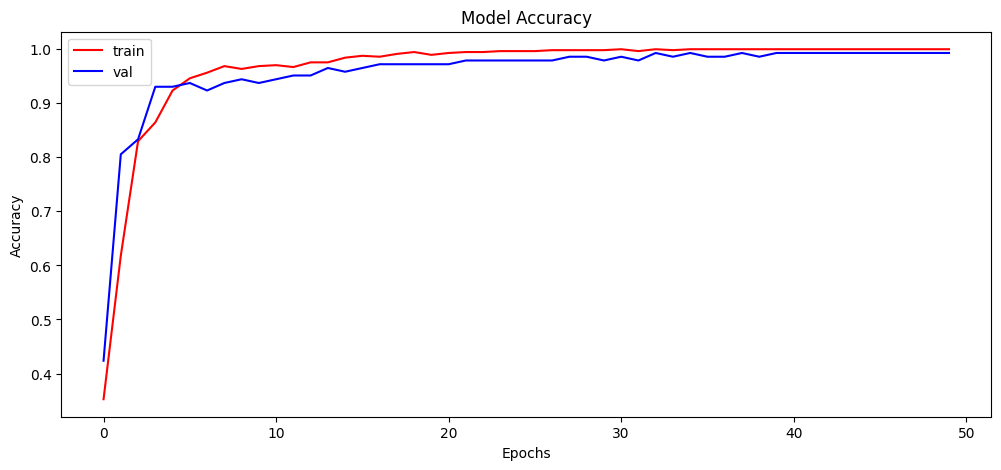

In [ ]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [ ]:
print("Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

Calculating model accuracy
6/6 [==============================] - 5s 852ms/step - loss: 0.0259 - accuracy: 0.9889
Test Accuracy: 98.88888597488403


In [ ]:
y_pred = model.predict(x_test)

6/6 [==============================] - 3s 486ms/step


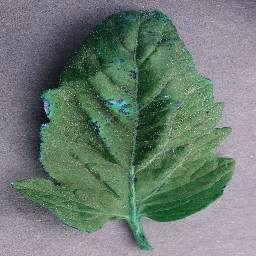

In [ ]:
# Plotting image to compare
img = array_to_img(x_test[11])
img

In [ ]:
# Finding max value from predition list and comaparing original value vs predicted
print("Original Label: ",all_labels[np.argmax(y_test[11])])
print("Predicted Label: ",all_labels[np.argmax(y_pred[4])])
print (y_pred[2])

Original Label:  Tomato-Bacterial_spot
Predicted Label:  Tomato-Bacterial_spot
[2.3156518e-07 1.7388084e-03 9.9826092e-01]


In [ ]:
for i in range(50):
  print (all_labels[np.argmax(y_test[i])], "-", all_labels[np.argmax(y_pred[i])])

Potato-Early_blight - Potato-Early_blight
Tomato-Bacterial_spot - Tomato-Bacterial_spot
Corn-Common_rust - Corn-Common_rust
Tomato-Bacterial_spot - Tomato-Bacterial_spot
Tomato-Bacterial_spot - Tomato-Bacterial_spot
Corn-Common_rust - Corn-Common_rust
Tomato-Bacterial_spot - Tomato-Bacterial_spot
Potato-Early_blight - Potato-Early_blight
Potato-Early_blight - Potato-Early_blight
Potato-Early_blight - Potato-Early_blight
Potato-Early_blight - Potato-Early_blight
Tomato-Bacterial_spot - Tomato-Bacterial_spot
Corn-Common_rust - Corn-Common_rust
Corn-Common_rust - Corn-Common_rust
Tomato-Bacterial_spot - Tomato-Bacterial_spot
Corn-Common_rust - Corn-Common_rust
Tomato-Bacterial_spot - Tomato-Bacterial_spot
Tomato-Bacterial_spot - Tomato-Bacterial_spot
Corn-Common_rust - Corn-Common_rust
Corn-Common_rust - Corn-Common_rust
Corn-Common_rust - Corn-Common_rust
Tomato-Bacterial_spot - Tomato-Bacterial_spot
Tomato-Bacterial_spot - Tomato-Bacterial_spot
Corn-Common_rust - Corn-Common_rust
Potato